# DIVE INTO CODE COURSE
## Exploratory data analysis Pre-class assignment 2 Analysis of housing information
### Doan Anh Tien - 1852789 - tien.doan.g0pr0@hcmut.edu.vn

### \[Problem 1] Obtaining a dataset
I downloaded the dataset by using Kaggle API and the command 
kaggle competitions download -c house-prices-advanced-regression-techniques in Anaconda terminal.

In [194]:
import pandas as pd
import missingno as msno

In [195]:
df = pd.read_csv('house_prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### \[Problem 2] Investigating the dataset itself

From the Overview page on Kaggle, it indicates that this dataset contains 79 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, and by using the data analyst should predict the final price of each home.

For example, the first 5 variables described on Kaggle:
<ul>
<li>SalePrice - the property's sale price in dollars. This is the target variable that we're trying to predict.</li>
<li>MSSubClass: The building class</li>
<li>MSZoning: The general zoning classification</li>
<li>LotFrontage: Linear feet of street connected to property</li>
<li>LotArea: Lot size in square feet</li>
</ul>

### \[Problem 3] Checking the data

First we will display the information of the first 10 rows

In [196]:
df.iloc[:,0:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   MSSubClass   1460 non-null   int64  
 2   MSZoning     1460 non-null   object 
 3   LotFrontage  1201 non-null   float64
 4   LotArea      1460 non-null   int64  
 5   Street       1460 non-null   object 
 6   Alley        91 non-null     object 
 7   LotShape     1460 non-null   object 
 8   LandContour  1460 non-null   object 
 9   Utilities    1460 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 114.2+ KB


The Dtype column shows us some interesting information that not all feature has integer datatype. In fact, it also has float, or object - which could be a string or a character.

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The features stay at the last are also diversed and they are mostly int64 or object.
And, we can see the there is the feature SalePrice at the end, with the datatype of integer, we can confidently say that this is our target variable since we are going to predict the price of the house.

In [198]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Mininum price = 34900\$
<br>Maximum price = 755000\$
<br>Sound reasonable for a feature represent prices of the house right?

And here are the information of mean, standard deviation and other properties.

In [199]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


It showed only 38 columns, so we can assume these are the features with number data.

### \[Problem 4] Dealing with missing values

Let's check the feature that has too many missing value that we observe from the dataframe

1369


<AxesSubplot:>

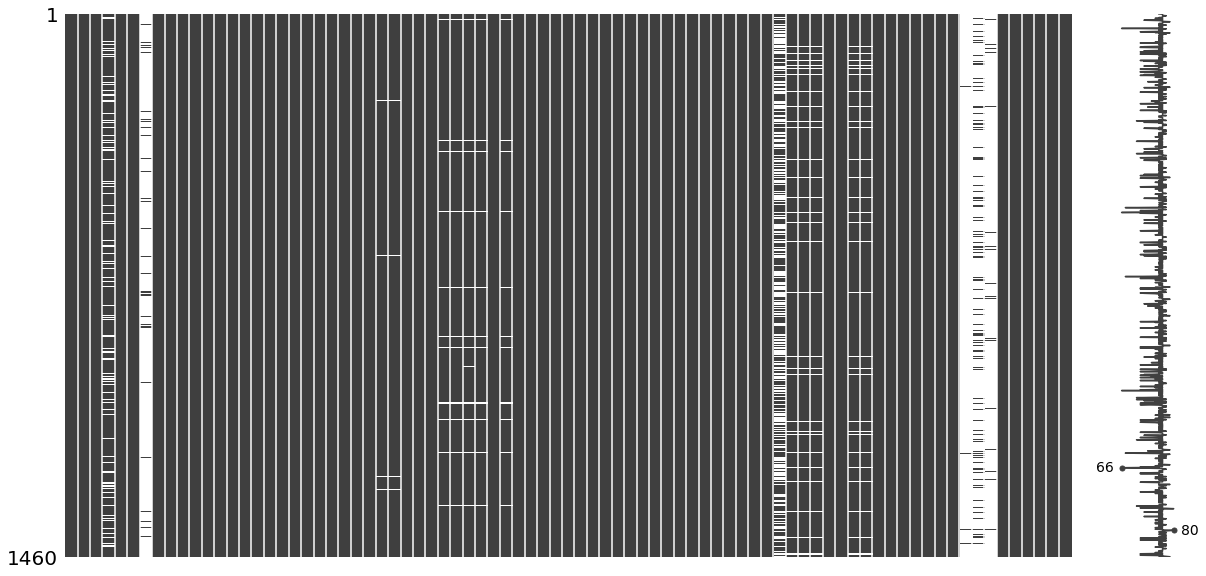

In [200]:
msno.matrix(df, figsize=(20,10))

When using matrix function from missingno library, it show pattern of our data and we can see there are some features missing too many values.

In [201]:
# Create a hash dictionary contain missing ratio of each feature
miss_dict = {}
for columns in df:
    count = df[columns].isna().sum()
    ratio = count/len(df[columns])
    miss_dict[columns] = [count, ratio]

In [202]:
miss_ratio = pd.DataFrame(miss_dict, {'Total', 'Missing_Ratio'}).T
print("Missing ratio table")
miss_ratio

Missing ratio table


,Missing_Ratio,Total
Id,0.0,0.000000
MSSubClass,0.0,0.000000
MSZoning,0.0,0.000000
LotFrontage,259.0,0.177397
LotArea,0.0,0.000000
...,...,...
MoSold,0.0,0.000000
YrSold,0.0,0.000000
SaleType,0.0,0.000000
SaleCondition,0.0,0.000000


We now display the feature with missing ratio > 0 (which means they have missing values)

In [203]:
miss_feature = miss_ratio[miss_ratio.Missing_Ratio > 0]
print("Total feature missing values {}".format(len(miss_feature)))
miss_feature

Total feature missing values 19


,Missing_Ratio,Total
LotFrontage,259.0,0.177397
Alley,1369.0,0.937671
MasVnrType,8.0,0.005479
MasVnrArea,8.0,0.005479
BsmtQual,37.0,0.025342
BsmtCond,37.0,0.025342
BsmtExposure,38.0,0.026027
BsmtFinType1,37.0,0.025342
BsmtFinType2,38.0,0.026027
Electrical,1.0,0.000685


From what we saw, there are many features missing too many values as we expected, and there are values missing not too many. We will delete any feature missing more than 5 values in this dataset.

In [204]:
df2 = df # temp dataframe that we will use for later question

In [205]:
for columns in df2:
    if (miss_dict[columns][0] >= 5):
        df2.drop(columns , axis=1, inplace=True) # We drop out when the missing value of feature in dictionary is greater than 5

In [206]:
df2.drop('Id', axis=1, inplace=True) # we also drop out the Id column
df2

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


The number of features reduced from 80 to 63, so there 18 unqualified features.

### \[Problem 5] Researching terminology

<b>Kurtosis</b> is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

<b>Skewness</b> is a measure of asymmetry or distortion of symmetric distribution. It measures the deviation of the given distribution of a random variable from a symmetric distribution, such as normal distribution.

### \[Problem 6] Confirming distribution

In [207]:
import seaborn as sns, numpy as np

C:\Users\ferbd\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution before log transformation')

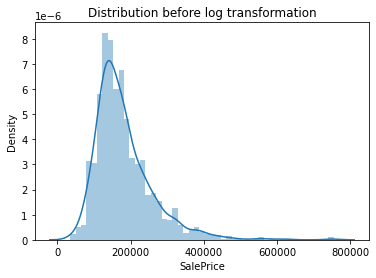

In [208]:
ax = sns.distplot(df2['SalePrice'])
ax.set_title("Distribution before log transformation")

In [209]:
from scipy.stats import skew, kurtosis
print("Skewness value: {}".format(skew(df2['SalePrice'], bias=False)))
print("Kurtosis value: {}".format(kurtosis(df2['SalePrice'], bias=False)))

Skewness value: 1.8828757597682126
Kurtosis value: 6.536281860064527


C:\Users\ferbd\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution after log transformation')

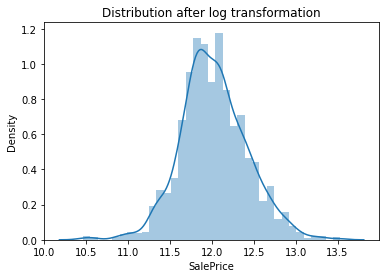

In [210]:
df2_log = np.log(df2['SalePrice'])
ax = sns.distplot(df2_log)
ax.set_title("Distribution after log transformation")

In [211]:
print("Skewness value: {}".format(skew(df2_log, bias=False)))
print("Kurtosis value: {}".format(kurtosis(df2_log, bias=False)))

Skewness value: 0.12133506220520404
Kurtosis value: 0.8095319958036296


In the graph before log transformation, the highest value is between somewhere 150k - 200k. So if we take log value of it, the new value would be approximately 11-13.

The old skewness is ~ 1.9, which show that the tail is on the right side and our distribution is asymmetrical. Log transformation helps reducing skewness. And we saw that after using log, skewness reduced towards 0 and our distribution is nearly become symmetric and transform into normal distribution (a normal distribution has the mean equal zero, the standard deviation equal 1, zero skew and a kurtosis of 3.)

All function or value that being log transformed will always has the curve with the slope cut at (e,1) and (0,1), which make the data less scattered, and the magnitude of x values (a range) will be close to each other

Nevertheless, this log transformation would help us to interpret the data and making assumption more easily.

### \[Problem 7] Confirming the correlation coefficient

In [212]:
matrix = df2.corr(method="pearson")
matrix

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


The corr function take only number data into account, so there are total 35 rows and columns and form a 35x35 correlation coefficient matrix 

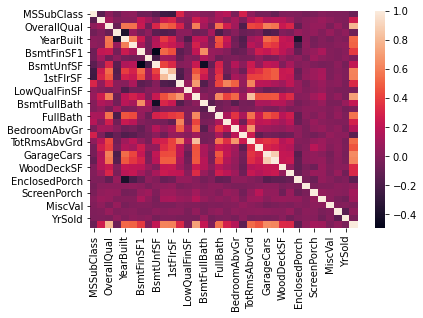

In [257]:
ax = sns.heatmap(matrix)

We can see there are some yellow-ish field in the middle of the heatmap, which demonstrate some of the high correlation coefficients

In [239]:
corre_dict = dict(matrix['SalePrice'][:-1])

import heapq
corre_10 = heapq.nlargest(10, corre_dict.items(), key=lambda i: i[1])
print("The 10 highest correlation coefficients: \n{}".format(pd.DataFrame(corre_10)))

The 10 highest correlation coefficients: 
              0         1
0   OverallQual  0.790982
1     GrLivArea  0.708624
2    GarageCars  0.640409
3    GarageArea  0.623431
4   TotalBsmtSF  0.613581
5      1stFlrSF  0.605852
6      FullBath  0.560664
7  TotRmsAbvGrd  0.533723
8     YearBuilt  0.522897
9  YearRemodAdd  0.507101


In [240]:
df3 = df2 # temporary dataframe

for columns in df2:
    if columns not in dict(corre_10):
        df3.drop(columns, axis=1, inplace=True)

matrix_10 = df3.corr(method="pearson")
matrix_10

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
OverallQual,1.000000,0.572323,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022
YearBuilt,0.572323,1.000000,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954
TotalBsmtSF,0.537808,0.391452,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665
1stFlrSF,0.476224,0.281986,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782
GrLivArea,0.593007,0.199010,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997
FullBath,0.550600,0.468271,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656
TotRmsAbvGrd,0.427452,0.095589,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822
GarageCars,0.600671,0.537850,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475
GarageArea,0.562022,0.478954,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000


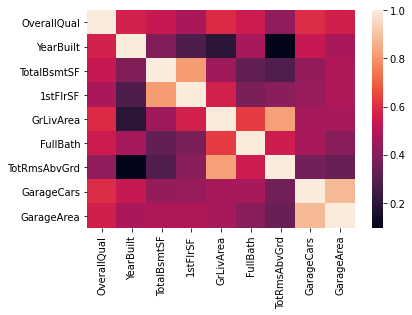

In [256]:
ax = sns.heatmap(matrix_10)

The 10 features that have been selected are described as:
<ul>
<li>OverrallQual: Overall material and finish quality</li>
<li>YearBuilt: Original construction date</li>
<li>YearRemodAdd: Remodel date</li>
<li>TotalBsmtSF: Total square feet of basement area</li>
<li>1stFlrSF: First Floor square feet</li>
<li>GrLivArea: Above grade (ground) living area square feet</li>
<li>FullBath: Full bathrooms above grade</li>
<li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li>
<li>GarageCars: Size of garage in car capacity</li>
<li>GarageArea: Size of garage in square feet</li>
</ul


From the heat map, we can choose 3 combinations with high correlation coefficients among two features. They are:<br>
1. GarageArea and GaragaeCars ~ 0.88<br>
2. TotalBsmtSF and 1stFlrSF ~ 0.852<br>
3. TotRmsAbvGrd and GrLivArea ~ 0.852<br>